<a href="https://colab.research.google.com/github/Calaabdul/Fake-News-Classifier/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Fake News Classification Using NLP

This Project explores how Natural Language Processing(NLP) can be used to automatically detect whether a news article is **real** or **fake**.

The goal is to help readers and platforms identify misleading information without manually reading every article.


## Background

Fake news spreads quickly on the internet and can mislead people. Manually checking every news article is impossible.

In this project, I built a Machine Learning Model that can automatically classify news into  **real** or **fake** based on their content.

# Data Collection and Preparation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [ ]:
# nltk.download('punkt_tab')
# nltk.download('wordnet')

In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
fake_df = pd.read_csv('/content/drive/MyDrive/Data/Fake.csv')
true_df = pd.read_csv('/content/drive/MyDrive/Data/True.csv')

In [ ]:
print(fake_df.shape)
print(true_df.shape)

(23481, 4)
(21417, 4)


In [ ]:
fake_df.columns.difference(true_df.columns)

Index([], dtype='object')

In [ ]:
fake_df = fake_df.assign(is_fake=1)
true_df = true_df.assign(is_fake=0)

In [ ]:
true_df.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
# concatenate data
df = pd.concat([fake_df, true_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

In [ ]:
def wrangle(data):
  data.drop(columns=['title', 'subject', 'date'], inplace=True)
  data.drop_duplicates(inplace=True)
  return data

In [ ]:
df = wrangle(df)

In [ ]:
df.shape

(38647, 2)

In [ ]:
df.head()

,text,is_fake
0,BEIRUT (Reuters) - Lebanon s interior minister...,0
1,(Reuters) - A Kansas state senator on Monday d...,0
2,WASHINGTON (Reuters) - Russian President Vladi...,0
3,Just what we need another Trump-bashing RINO. ...,1
4,HAVANA (Reuters) - President Raul Castro calle...,0


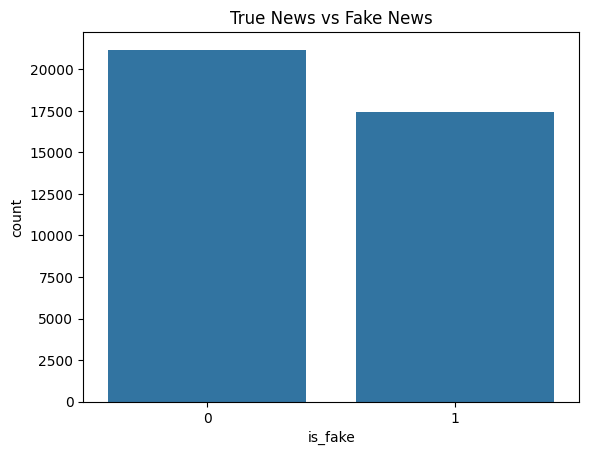

In [ ]:
g = sns.countplot(x='is_fake', data=df)
g.set_title('True News vs Fake News')
plt.show()

### Text Preprocessing

We remove punctuations, numbers, stopwords etc so that the model focuses on the most important words.

In [ ]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', ' ', text)
  # Remove URLs and HTML tags:
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'<[^>]+>', '', text)
  text = word_tokenize(text)

  stop_words = stopwords.words('english')
  text = [word for word in text if word not in stop_words]


  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text]
  text = ' '.join(text)

  return text

In [ ]:
df['text'] = df['text'].apply(preprocess)

In [ ]:
y = df['is_fake']
X = df[['text']]

## Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2025, stratify=y, test_size = 0.3)

In [ ]:
print(f'{X_train.shape}\n{y_train.shape}\n{X_test.shape}\n{y_test.shape}')

(27052, 1)
(27052,)
(11595, 1)
(11595,)


We experimented between two methods of vectorizing text data and see which one performs best

N/B: there are other several ways to vectorize text data

In [ ]:
count_vectorizer = CountVectorizer(max_df = .7, max_features = 10000)

In [ ]:
count_train = count_vectorizer.fit_transform(X_train['text'].values)
count_test = count_vectorizer.transform(X_test['text'].values)

In [ ]:
count_train = count_train.toarray()
count_test = count_test.toarray()

In [ ]:
count_vectorizer.get_feature_names_out()

array(['aaron', 'abadi', 'abandon', ..., 'zor', 'zuckerberg', 'zuma'],
      dtype=object)

In [ ]:
pd.DataFrame(count_train, columns=count_vectorizer.get_feature_names_out()).head()

,aaron,abadi,abandon,abandoned,abandoning,abbas,abbott,abc,abcpolitics,abd,...,zhang,zika,zimbabwe,zimbabwean,zimmerman,zinke,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
models = {
    'log_reg': LogisticRegression(),
    'naive_b': MultinomialNB(),
    'svm': SVC(kernel = 'linear')
}

In [ ]:
result = {}
for name, model in models.items():
  model.fit(count_train, y_train)
  y_pred = model.predict(count_test)
  accuracy = accuracy_score(y_test, y_pred)
  result[name] = accuracy
  print(f'{name}: {accuracy}')
  print(confusion_matrix(y_test, y_pred, labels = [True, False]))

log_reg: 0.9936179387667098
[[5189   48]
 [  26 6332]]
naive_b: 0.9444588184562311
[[4946  291]
 [ 353 6005]]
svm: 0.9922380336351876
[[5183   54]
 [  36 6322]]


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = .7, max_features = 10000)

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train['text'].values)
tfidf_test = tfidf_vectorizer.transform(X_test['text'].values)

In [ ]:
tfidf_train = tfidf_train.toarray()
tfidf_test = tfidf_test.toarray()

In [ ]:
tfidf_vectorizer.get_feature_names_out()

array(['abadi', 'abandon', 'abandoned', ..., 'zone', 'zor', 'zuma'],
      dtype=object)

In [ ]:
result_tf = {}
for name, model in models.items():
  model.fit(tfidf_train, y_train)
  y_pred_tf = model.predict(tfidf_test)
  accuracy_tf = accuracy_score(y_test, y_pred_tf)
  result_tf[name] = accuracy_tf
  print(f'{name}: {accuracy_tf}')
  print(confusion_matrix(y_test, y_pred_tf, labels = [True, False]))

log_reg: 0.9857697283311773
[[5124  113]
 [  52 6306]]
naive_b: 0.9325571366968521
[[4856  381]
 [ 401 5957]]
svm: 0.9921517895644675
[[5176   61]
 [  30 6328]]


## Results and Conclusion
Logistic Regression performed best with almost 99% accuracy. This means out of 100 articles, the Model correctly classifies about 99 of them.